In [3]:
# Import libraries
!pip install psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# Create a database connection
user = 'datascientist'
host = '3.7.155.14'
port='5432'
dbname = 'mimic'
schema = 'mimiciii'

In [5]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host,port=port, 
                       password=getpass.getpass(prompt='Password:'.format(user)))
#con = psycopg2.connect(dbname=dbname, user=user, host=host,port=port, 
#                       password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))


Password:··········


In [ ]:
query = \
"""
select count(*)

"""

col = pd.read_sql_query(query,con)
col

,count
0,1


In [ ]:
# Get length of stay from the icustays table

query = \
"""
SELECT i.subject_id, i.hadm_id, i.los
FROM icustays i;
"""

data = pd.read_sql_query(query,con)

In [ ]:
data.head()

,subject_id,hadm_id,los
0,268,110404,3.2490
1,269,106296,3.2788
2,270,188028,2.8939
3,271,173727,2.0600
4,272,164716,1.6202


In [ ]:
query = \
"""
SELECT p.subject_id, p.dob, a.hadm_id,
    a.admittime, p.expire_flag
FROM admissions a
INNER JOIN patients p
ON p.subject_id = a.subject_id;
"""

data2 = pd.read_sql_query(query,con)

In [ ]:
data2.head()

,subject_id,dob,hadm_id,admittime,expire_flag
0,22,2131-05-07,165315,2196-04-09 12:26:00,0
1,23,2082-07-17,152223,2153-09-03 07:15:00,0
2,23,2082-07-17,124321,2157-10-18 19:34:00,0
3,24,2100-05-31,161859,2139-06-06 16:14:00,0
4,25,2101-11-21,129635,2160-11-02 02:06:00,0


***1.Count the total number of Admissions***

In [ ]:
query = \
"""
SELECT a.row_id,a.subject_id, a.hadm_id,
    a.admittime, a.dischtime,a.admission_type
FROM mimiciii.admissions a;

"""

admissions = pd.read_sql_query(query,con)
admissions.count()

row_id            58976
subject_id        58976
hadm_id           58976
admittime         58976
dischtime         58976
admission_type    58976
dtype: int64

In [ ]:
admissions.isnull().sum()

row_id            0
subject_id        0
hadm_id           0
admittime         0
dischtime         0
admission_type    0
dtype: int64

In [ ]:
# Drop duplicate rows
admissions['subject_id'].drop_duplicates(keep ='last').count()

46520

***2.What percentage of Admissions was under Emergency***

In [ ]:
admissions['admission_type'].unique()

array(['EMERGENCY', 'ELECTIVE', 'NEWBORN', 'URGENT'], dtype=object)

In [ ]:
admissions['admission_type'].count()

58976

In [ ]:
admissions['admission_type'][admissions['admission_type']=='EMERGENCY'].count()

42071

In [ ]:
per=(admissions['admission_type'][admissions['admission_type']=='EMERGENCY'].count())/(admissions['admission_type'].count())
per*100

71.33579761258817

***3.Plot a graph of the count of various types of Admissions as a bar graph using python.***

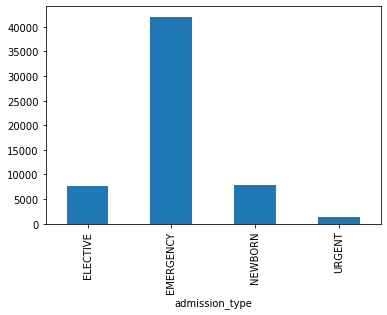

In [ ]:
admissions.groupby('admission_type')['admission_type'].count().plot(kind='bar', label ="Admission Type")

***4.What is SOFA score? Write a python program to find SOFA score of patients in the MIMIC3 database. (Please keep a note of the various materialized views or intermediate data required to compute the SOFA score. For this question, you will need to generate all the intermediate tables yourselves using python.)***

In [ ]:
query = \
"""
SELECT s.row_id,s.subject_id, s.hadm_id,
    s.curr_service,s.prev_service
FROM mimiciii.services s;

"""

services = pd.read_sql_query(query,con)
services

,row_id,subject_id,hadm_id,curr_service,prev_service
0,758,471,135879,MED,TSURG
1,759,471,135879,TSURG,MED
2,760,472,173064,CMED,None
3,761,473,129194,NB,None
4,762,474,194246,NB,None
...,...,...,...,...,...
73338,72914,98932,174244,CMED,None
73339,72915,98939,115549,NMED,None
73340,72916,98941,141129,CSURG,None
73341,72917,98943,193747,TRAUM,None


In [ ]:
query = \
"""
SELECT a.row_id,a.subject_id, a.hadm_id,
    a.admittime, a.dischtime,a.admission_type,a.diagnosis
    
FROM mimiciii.admissions a;

"""

services = pd.read_sql_query(query,con)
services

,row_id,subject_id,hadm_id,admittime,dischtime,admission_type,diagnosis
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,BENZODIAZEPINE OVERDOSE
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,BRAIN MASS
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,INTERIOR MYOCARDIAL INFARCTION
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,ACUTE CORONARY SYNDROME
...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,EMERGENCY,TRAUMA
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,EMERGENCY,SAH
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,ELECTIVE,RENAL CANCER/SDA
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,EMERGENCY,S/P FALL


In [ ]:
query = \
"""
SELECT l.row_id,l.subject_id, l.hadm_id,
    l.value,l.valuenum,l.valueuom,l.flag
    
FROM mimiciii.labevents l;

"""

services = pd.read_sql_query(query,con)
services.head()

In [ ]:
query = \
"""
SELECT d.row_id,d.itemid,d.label,d.unitname,d.linksto
    
FROM mimiciii.d_items d;

"""

item = pd.read_sql_query(query,con)
item['unitname'].unique()

array([None, 'mL', 'mEq', 'None', 'mmHg', 'cm', 'cmH2O', 'mg', 'min',
       'grams', 'International Units', 'L/min', 'ml/hr', 'insp/min', '?F',
       'kg', 'L/min/m2', '%', 'dynes*sec/cm5', 'years', 'units', 'bpm',
       'mL/min/m2', 'mL/beat', 'dynes*sec/cm5/m2', '?C', 'ml/min', 'dose',
       'mcg', 'mV', 'mA', 'mmol', 'sec', 'hour', 'mEq.', 'Liters', 'lbs',
       'kcal/day', 'mg/hour', 'ppm', 'psi', '/min', 'Degree', 'kcal/kg',
       'g/kg', 'mL SC', 'ounces', 'msec', 'g/dl', 'ml/kg', 'mL/m2',
       'dynes.sec.cm-5/m2', 'Inch', 'cmH2O/L/seconds'], dtype=object)

In [ ]:
item['label'].unique()

array(['Patient controlled analgesia (PCA) [Inject]', 'PCA Lockout (Min)',
       'PCA Medication', ..., 'HCO3ApacheIIValue', 'HCO3Score',
       'HematocritApacheIIScore'], dtype=object)

In [ ]:
item.head(100)

,row_id,itemid,label,unitname,linksto
0,457,497,Patient controlled analgesia (PCA) [Inject],None,chartevents
1,458,498,PCA Lockout (Min),None,chartevents
2,459,499,PCA Medication,None,chartevents
3,460,500,PCA Total Dose,None,chartevents
4,461,501,PCV Exh Vt (Obser),None,chartevents
...,...,...,...,...,...
95,1247,1100,PRESSURE BAG R.GROIN,None,chartevents
96,1248,1101,PROTONIX,None,chartevents
97,1249,1102,high exhaled min vol,None,chartevents
98,1250,1103,cvp,None,chartevents


In [ ]:
item.tail()

,row_id,itemid,label,unitname,linksto
12482,14518,226757,GCSMotorApacheIIValue,None,chartevents
12483,14519,226758,GCSVerbalApacheIIValue,None,chartevents
12484,14520,226759,HCO3ApacheIIValue,None,chartevents
12485,14521,226760,HCO3Score,None,chartevents
12486,14522,226761,HematocritApacheIIScore,None,chartevents


In [ ]:
item['unitname'][item['unitname']=='mmHg'].count()

83

In [ ]:
item_resp=item[item['unitname']=='mmHg']
item_resp[:]

,row_id,itemid,label,unitname,linksto
8741,14574,227066,Cerebral Perfusion Pressure,mmHg,chartevents
9204,15336,228148,ABI Ankle BP R (Impella),mmHg,chartevents
9205,15337,228149,ABI Brachial BP L (Impella),mmHg,chartevents
9212,15344,228158,Purge Pressure,mmHg,chartevents
9313,13049,224166,Doppler BP,mmHg,chartevents
...,...,...,...,...,...
12373,12764,223768,Intra Cranial Pressure Alarm - Low,mmHg,chartevents
12376,12767,223771,PCWP,mmHg,chartevents
12443,13687,225309,ART BP Systolic,mmHg,chartevents
12444,13688,225310,ART BP Diastolic,mmHg,chartevents


In [ ]:
item_resp.tail(100)

,row_id,itemid,label,unitname,linksto
8741,14574,227066,Cerebral Perfusion Pressure,mmHg,chartevents
9204,15336,228148,ABI Ankle BP R (Impella),mmHg,chartevents
9205,15337,228149,ABI Brachial BP L (Impella),mmHg,chartevents
9212,15344,228158,Purge Pressure,mmHg,chartevents
9313,13049,224166,Doppler BP,mmHg,chartevents
...,...,...,...,...,...
12373,12764,223768,Intra Cranial Pressure Alarm - Low,mmHg,chartevents
12376,12767,223771,PCWP,mmHg,chartevents
12443,13687,225309,ART BP Systolic,mmHg,chartevents
12444,13688,225310,ART BP Diastolic,mmHg,chartevents


In [ ]:
item[item['unitname']=='mmHg']['label'].unique()

array(['Cerebral Perfusion Pressure', 'ABI Ankle BP R (Impella)',
       'ABI Brachial BP L (Impella)', 'Purge Pressure', 'Doppler BP',
       'Manual Blood Pressure Systolic Left',
       'Manual Blood Pressure Diastolic Right',
       'Manual Blood Pressure Systolic Right',
       'RA (mean) pressure (PA Line)', 'RV systolic pressure(PA Line)',
       'RV diastolic pressure(PA Line)', 'PA systolic pressure(PA Line)',
       'PA diastolic pressure(PA Line)', 'PCWP (v wave) (PA Line)',
       'PCWP (mean) (PA Line)', 'PA mean pressure (PA Line)',
       'Non-Invasive Blood Pressure Alarm - High', 'MAP_ApacheIV',
       'PO2_ApacheIV', 'Access Pressure', 'Filter Pressure',
       'Effluent Pressure', 'Return Pressure', 'PO2 (Mixed Venous)',
       'Assisted Systole', 'Augmented Diastole', 'BAEDP',
       'ABI Brachial BP R (Impella)', 'ABI Brachial BP L',
       'ABI Ankle BP R', 'ABI Ankle BP L (Impella)', 'IABP Mean',
       'ART Blood Pressure Alarm - High',
       'ART Blood Pressur

In [ ]:
item_resp[item_resp['label']=='Venous O2 Pressure']

,row_id,itemid,label,unitname,linksto
11649,14345,226063,Venous O2 Pressure,mmHg,chartevents


In [ ]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from admissions'
df = pd.read_sql_query(query,con)
df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


**RESPIRATORY (mmhg)**

In [6]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_200'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,17,23,124321,234044.0,226253,2157-10-21 12:43:00,2157-10-21 12:43:00,16978.0,85,85.0,%,0,0,None,None
1,231,23,124321,234044.0,226253,2157-10-22 08:00:00,2157-10-22 08:48:00,19907.0,85,85.0,%,0,0,None,None
2,675,36,165660,241249.0,226253,2134-05-12 06:00:00,2134-05-12 06:58:00,16934.0,85,85.0,%,0,0,None,None
3,704,36,165660,241249.0,226253,2134-05-12 07:04:00,2134-05-12 07:04:00,17525.0,85,85.0,%,0,0,None,None
4,373,34,144319,290505.0,226253,2191-02-23 08:00:00,2191-02-23 07:46:00,17741.0,85,85.0,%,0,0,None,None


In [7]:
ce_2=ce_1[ce_1['itemid']==226063]
ce_2

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
70,5614,109,126055,236124.0,226063,2141-10-14 09:27:00,2141-10-14 09:32:00,20889.0,149,149.0,mmHg,1,0,None,None
85,5424,109,172335,262652.0,226063,2141-09-22 13:22:00,2141-09-22 13:25:00,20889.0,41,41.0,mmHg,1,0,None,None
90,5817,109,126055,236124.0,226063,2141-10-15 13:56:00,2141-10-15 14:00:00,20889.0,52,52.0,mmHg,1,0,None,None
100,6831,109,126055,236124.0,226063,2141-10-20 15:25:00,2141-10-20 15:29:00,20889.0,185,185.0,mmHg,1,0,None,None
108,6376,109,126055,236124.0,226063,2141-10-18 06:31:00,2141-10-18 06:36:00,20889.0,40,40.0,mmHg,1,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335975,33955901,99260,181010,206662.0,226063,2190-12-21 05:42:00,2190-12-21 05:51:00,20889.0,50,50.0,mmHg,1,0,None,None
336080,33913502,99178,173596,269996.0,226063,2107-01-18 09:06:00,2107-01-18 09:10:00,20889.0,94,94.0,mmHg,1,0,None,None
336091,33930912,99197,145322,210950.0,226063,2124-01-04 21:52:00,2124-01-04 21:54:00,20889.0,42,42.0,mmHg,1,0,None,None
336323,33914755,99178,173596,269996.0,226063,2107-01-21 05:38:00,2107-01-21 05:40:00,20889.0,87,87.0,mmHg,0,0,None,None


In [8]:
id=pd.DataFrame(ce_2['subject_id']+ce_2['hadm_id']+ce_2['icustay_id'],columns=['id'])
list(id.columns)

['id']

In [9]:
respiratory=pd.concat([id,ce_2[['value']] ], axis=1, sort=False)
list(respiratory.columns)

['id', 'value']

In [10]:
def sofa_resp (row):
  if int(row['value'])<100:
    return 4
  elif int(row['value'])<200:
    return 3
  elif int(row['value'])<300:
    return 2
  elif int(row['value'])<400:
    return 1
  elif int(row['value'])>=400:
    return 0

respiratory['sofa_resp'] = respiratory.apply (lambda row: sofa_resp(row), axis=1)
respiratory

,id,value,sofa_resp
70,362288.0,149,3
85,435096.0,41,4
90,362288.0,52,4
100,362288.0,185,3
108,362288.0,40,4
...,...,...,...
335975,486932.0,50,4
336080,542770.0,94,4
336091,455469.0,42,4
336323,542770.0,87,4


***GCS***

In [ ]:
gcs=item[item['unitname']=='None']['label']
item[item['unitname']=='None']['label'].unique()

array(['Triple Introducer', 'Indwelling Port (PortaCath)',
       'Pheresis Catheter', 'Midline', 'RIC', 'Cash amount', 'Anion gap',
       'Extubation', 'Intraosseous Device', 'EtCO2', 'CT scan', 'X-ray',
       'Ultrasound', 'Venogram', 'EEG', 'Trans Esophageal Echo',
       'Lumbar Puncture', 'Bronchoscopy', 'Blood Cultured', 'EKG',
       'Transferred to Floor', 'Aortic Pressure Signal - Diastolic',
       'Aortic Pressure Signal - Systolic', 'Impella Line', 'MDI #1 Puff',
       'MDI #2 Puff', 'MDI #3 Puff', 'Small Volume Neb Dose #2',
       'Pulsus Paradoxus', 'Multi Lumen', 'PICC Line',
       'Cordis/Introducer', 'Trauma line', 'CCO PAC', 'Dialysis Catheter',
       'IABP line', 'Presep Catheter', '22 Gauge', '20 Gauge', '16 Gauge',
       '18 Gauge', 'Urine Culture', 'Ventricular Drain',
       'Abdominal X-Ray', 'Chest X-Ray', 'Cervical Spine', 'Pelvis',
       'Interventional Radiology', 'TLS Spine',
       'Cardioversion/Defibrillation', 'Chest Pain', 'Cardiac Arrest',
   

In [ ]:
item[item['label']=='GcsScore_ApacheIV']

,row_id,itemid,label,unitname,linksto
9682,14690,227013,GcsScore_ApacheIV,None,chartevents


In [ ]:
item[item['label']=='GcsApacheIIScore']

,row_id,itemid,label,unitname,linksto
12480,14516,226755,GcsApacheIIScore,None,chartevents


In [11]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_202'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,42,23,124321,234044.0,227073,2157-10-21 14:40:00,2157-10-21 15:53:00,20889.0,15,15.0,mEq/L,0,0,None,None
1,43,23,124321,234044.0,227442,2157-10-21 14:40:00,2157-10-21 15:53:00,20889.0,3.9,3.9,mEq/L,0,0,None,None
2,44,23,124321,234044.0,227443,2157-10-21 14:40:00,2157-10-21 15:53:00,20889.0,25,25.0,mEq/L,0,0,None,None
3,45,23,124321,234044.0,227457,2157-10-21 14:40:00,2157-10-21 15:06:00,20889.0,208,208.0,K/uL,0,0,None,None
4,183,23,124321,234044.0,227073,2157-10-22 03:21:00,2157-10-22 04:12:00,20889.0,12,12.0,mEq/L,0,0,None,None


In [12]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_201'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,347,34,144319,290505.0,226871,2191-02-23 07:31:00,2191-02-23 07:35:00,16924.0,3.8,3.8,None,0,0,None,None
1,348,34,144319,290505.0,226873,2191-02-23 07:31:00,2191-02-23 07:35:00,16924.0,1,1.0,None,0,0,None,None
2,355,34,144319,290505.0,226512,2191-02-23 07:44:00,2191-02-23 07:44:00,17741.0,74.5,74.5,kg,0,0,None,None
3,356,34,144319,290505.0,226531,2191-02-23 07:44:00,2191-02-23 07:44:00,17741.0,163.9,163.9,None,0,0,None,None
4,268,23,124321,234044.0,226531,2157-10-22 10:43:00,2157-10-22 10:43:00,21253.0,147,147.0,None,0,0,None,None


In [13]:
ce_3=ce_1[ce_1['itemid']==226755]
ce_3

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
1239,85994,711,158767,270525.0,226755,2185-03-23 14:26:00,2185-03-23 14:29:00,19006.0,7,7.0,None,0,0,None,None
1323,86119,711,158767,270525.0,226755,2185-03-23 15:07:00,2185-03-23 15:19:00,19006.0,7,7.0,None,0,0,None,None
25921,1150560,10757,153982,256332.0,226755,2180-11-14 00:26:00,2180-11-14 00:26:00,14770.0,0,0.0,None,0,0,None,None
48604,2658460,22792,192087,271490.0,226755,2173-10-23 07:07:00,2173-10-23 07:08:00,15511.0,0,0.0,None,0,0,None,None
59244,3301308,27366,174736,248077.0,226755,2143-03-01 09:16:00,2143-03-01 09:18:00,16671.0,5,5.0,None,0,0,None,None
59462,3301382,27366,174736,248077.0,226755,2143-03-01 11:24:00,2143-03-01 11:25:00,15237.0,0,0.0,None,0,0,None,None
61156,3413066,27554,186902,229620.0,226755,2196-11-07 14:27:00,2196-11-07 14:29:00,15103.0,12,12.0,None,0,0,None,None
69018,3794755,28819,135454,212633.0,226755,2116-02-11 02:18:00,2116-02-11 02:20:00,19006.0,6,6.0,None,0,0,None,None
69988,3887393,29070,115071,232563.0,226755,2145-03-13 17:50:00,2145-03-13 17:51:00,15052.0,1,1.0,None,0,0,None,None
70178,3887360,29070,115071,232563.0,226755,2145-03-13 17:39:00,2145-03-13 17:40:00,15052.0,5,5.0,None,0,0,None,None


In [14]:
id=pd.DataFrame(ce_3['subject_id']+ce_3['hadm_id']+ce_3['icustay_id'],columns=['id'])
list(id.columns)

['id']

In [15]:
gcs_scr=pd.concat([id,ce_3[['value']] ], axis=1, sort=False)
list(gcs_scr.columns)
gcs_scr

,id,value
1239,430003.0,7
1323,430003.0,7
25921,421071.0,0
48604,486369.0,0
59244,450179.0,5
59462,450179.0,0
61156,444076.0,12
69018,376906.0,6
69988,376704.0,1
70178,376704.0,5


In [16]:
def sofa_gcs (row):
  if float(row['value'])==15:
    return 0
  elif float(row['value'])<=14 and float(row['value'])>=13:
    return 1
  elif float(row['value'])<=12 and float(row['value'])>=10:
    return 2
  elif float(row['value'])<=9 and float(row['value'])>=6:
    return 3
  elif float(row['value'])<6:
    return 4

gcs_scr['sofa_gcs'] = gcs_scr.apply (lambda row: sofa_gcs(row), axis=1)
gcs_scr

,id,value,sofa_gcs
1239,430003.0,7,3
1323,430003.0,7,3
25921,421071.0,0,4
48604,486369.0,0,4
59244,450179.0,5,4
59462,450179.0,0,4
61156,444076.0,12,2
69018,376906.0,6,3
69988,376704.0,1,4
70178,376704.0,5,4


***Cardiovascular system***

In [ ]:
item_resp[item_resp['label']=='Arterial Blood Pressure mean']

,row_id,itemid,label,unitname,linksto
11506,12718,220052,Arterial Blood Pressure mean,mmHg,chartevents


In [17]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_161'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,272,23,124321,234044.0,220052,2157-10-22 11:00:00,2157-10-22 11:05:00,19907.0,87,87.0,mmHg,0,0,None,None
1,281,23,124321,234044.0,220052,2157-10-22 12:00:00,2157-10-22 12:49:00,19907.0,95,95.0,mmHg,0,0,None,None
2,290,23,124321,234044.0,220052,2157-10-22 13:00:00,2157-10-22 13:35:00,19907.0,74,74.0,mmHg,0,0,None,None
3,299,23,124321,234044.0,220052,2157-10-22 14:00:00,2157-10-22 15:03:00,16890.0,77,77.0,mmHg,0,0,None,None
4,308,23,124321,234044.0,220052,2157-10-22 15:00:00,2157-10-22 15:03:00,16890.0,82,82.0,mmHg,0,0,None,None


In [18]:
ce_4=ce_1[ce_1['itemid']==220052]
ce_4

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,272,23,124321,234044.0,220052,2157-10-22 11:00:00,2157-10-22 11:05:00,19907.0,87,87.0,mmHg,0,0,None,None
1,281,23,124321,234044.0,220052,2157-10-22 12:00:00,2157-10-22 12:49:00,19907.0,95,95.0,mmHg,0,0,None,None
2,290,23,124321,234044.0,220052,2157-10-22 13:00:00,2157-10-22 13:35:00,19907.0,74,74.0,mmHg,0,0,None,None
3,299,23,124321,234044.0,220052,2157-10-22 14:00:00,2157-10-22 15:03:00,16890.0,77,77.0,mmHg,0,0,None,None
4,308,23,124321,234044.0,220052,2157-10-22 15:00:00,2157-10-22 15:03:00,16890.0,82,82.0,mmHg,0,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156168,33929518,99186,111707,274991.0,220052,2183-10-02 22:25:00,2183-10-02 22:37:00,16714.0,68,68.0,mmHg,0,0,None,None
1156169,33919302,99185,143017,244459.0,220052,2129-06-10 11:00:00,2129-06-10 11:16:00,16915.0,67,67.0,mmHg,0,0,None,None
1156170,33919319,99185,143017,244459.0,220052,2129-06-10 12:00:00,2129-06-10 12:04:00,17600.0,90,90.0,mmHg,0,0,None,None
1156171,33919360,99185,143017,244459.0,220052,2129-06-10 12:15:00,2129-06-10 12:23:00,17600.0,75,75.0,mmHg,0,0,None,None


In [19]:
id=pd.DataFrame(ce_4['subject_id']+ce_4['hadm_id']+ce_4['icustay_id'],columns=['id'])
list(id.columns)
cardio=pd.concat([id,ce_4[['value']] ], axis=1, sort=False)
list(cardio.columns)
cardio.rename(columns={'value':'amount'})

,id,amount
0,358388.0,87
1,358388.0,95
2,358388.0,74
3,358388.0,77
4,358388.0,82
...,...,...
1156168,485884.0,68
1156169,486661.0,67
1156170,486661.0,90
1156171,486661.0,75


In [20]:
def sofa_cardio_1 (row):
  if float(row['value'])>=75:
    return 0
  elif float(row['value'])<75:
    return 1

cardio['sofa_cardio'] = cardio.apply (lambda row: sofa_cardio_1(row), axis=1)
cardio

,id,value,sofa_cardio
0,358388.0,87,0
1,358388.0,95,0
2,358388.0,74,1
3,358388.0,77,0
4,358388.0,82,0
...,...,...,...
1156168,485884.0,68,1
1156169,486661.0,67,1
1156170,486661.0,90,0
1156171,486661.0,75,0


In [21]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from d_items'
d_items = pd.read_sql_query(query,con)
d_items.head()

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,457,497,Patient controlled analgesia (PCA) [Inject],None,carevue,chartevents,None,None,None,None
1,458,498,PCA Lockout (Min),None,carevue,chartevents,None,None,None,None
2,459,499,PCA Medication,None,carevue,chartevents,None,None,None,None
3,460,500,PCA Total Dose,None,carevue,chartevents,None,None,None,None
4,461,501,PCV Exh Vt (Obser),None,carevue,chartevents,None,None,None,None


In [ ]:
d_items['unitname'].unique()

array([None, 'mL', 'mEq', 'None', 'mmHg', 'cm', 'cmH2O', 'mg', 'min',
       'grams', 'International Units', 'L/min', 'ml/hr', 'insp/min', '?F',
       'kg', 'L/min/m2', '%', 'dynes*sec/cm5', 'years', 'units', 'bpm',
       'mL/min/m2', 'mL/beat', 'dynes*sec/cm5/m2', '?C', 'ml/min', 'dose',
       'mcg', 'mV', 'mA', 'mmol', 'sec', 'hour', 'mEq.', 'Liters', 'lbs',
       'kcal/day', 'mg/hour', 'ppm', 'psi', '/min', 'Degree', 'kcal/kg',
       'g/kg', 'mL SC', 'ounces', 'msec', 'g/dl', 'ml/kg', 'mL/m2',
       'dynes.sec.cm-5/m2', 'Inch', 'cmH2O/L/seconds'], dtype=object)

In [ ]:
d_items[d_items['label']=='dobutamine']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
2396,1850,5747,dobutamine,None,carevue,chartevents,None,None,None,None


In [ ]:
d_items[d_items['label']=='Dopamine']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
2661,2115,5329,Dopamine,None,carevue,chartevents,None,None,None,None
4901,5106,30043,Dopamine,None,carevue,inputevents_cv,None,None,None,None
8891,12972,221662,Dopamine,Dopamine,metavision,inputevents_mv,Medications,mg,Solution,None


In [22]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_121'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,34323645,10,184167,288409.0,3723,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,1.3849999904632568,1.385,kg,None,None,None,NotStopd
1,34323646,10,184167,288409.0,4187,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,15.748000144958496,15.748,cm,None,None,None,NotStopd
2,34323647,10,184167,288409.0,4188,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,40,40.000,Inches,None,None,None,NotStopd
3,34345521,21,109451,217847.0,5683,2134-09-14 12:00:00,2134-09-14 12:01:00,19525,70,70.000,None,None,None,None,NotStopd
4,34345546,21,109451,217847.0,5683,2134-09-14 13:00:00,2134-09-14 13:05:00,19525,70,70.000,None,None,None,None,NotStopd


In [23]:
ce_5=ce_1[ce_1['itemid']==5329]
ce_5

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
302702,67787351,6532,159338,227437.0,5329,2108-11-11 04:45:00,2108-11-11 05:15:00,15157,started,NaN,None,None,None,None,None


In [24]:
ce_5=ce_1[ce_1['itemid']==5747]
ce_5

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
1149318,161614068,25327,143494,262598.0,5747,2147-07-03 03:00:00,2147-07-03 07:01:00,19599,None,NaN,None,None,None,None,None


In [25]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select subject_id,hadm_id,icustay_id,itemid,amount from inputevents_cv'
ce_1 = pd.read_sql_query(query,con)
ce_1.head()

,subject_id,hadm_id,icustay_id,itemid,amount
0,24457,184834.0,205776.0,30056,100.0
1,24457,184834.0,205776.0,30056,200.0
2,24457,184834.0,205776.0,30056,160.0
3,24457,184834.0,205776.0,30056,240.0
4,24457,184834.0,205776.0,30056,50.0


In [26]:
#Dopamine
ce_5=ce_1[ce_1['itemid']==30043]
ce_5

,subject_id,hadm_id,icustay_id,itemid,amount
8676800,7605,107327.0,276732.0,30043,49.500000
8676853,590,172260.0,258414.0,30043,53.100000
8676854,12744,116766.0,270724.0,30043,34.200000
8676855,2128,152495.0,208642.0,30043,58.559991
8676856,20866,147338.0,208231.0,30043,8.025000
...,...,...,...,...,...
17525789,29601,188620.0,241690.0,30043,NaN
17525830,30286,193809.0,263130.0,30043,NaN
17525837,30286,193809.0,263130.0,30043,NaN
17525848,30286,193809.0,263130.0,30043,NaN


In [27]:
id=pd.DataFrame(ce_5['subject_id']+ce_5['hadm_id']+ce_5['icustay_id'],columns=['id'])
list(id.columns)
cardio_new=pd.concat([id,ce_5[['amount']] ], axis=1, sort=False)
list(cardio_new.columns)
cardio_new

,id,amount
8676800,391664.0,49.500000
8676853,431264.0,53.100000
8676854,400234.0,34.200000
8676855,363265.0,58.559991
8676856,376435.0,8.025000
...,...,...
17525789,459911.0,NaN
17525830,487225.0,NaN
17525837,487225.0,NaN
17525848,487225.0,NaN


In [28]:
def sofa_cardio_2 (row):
  if float(row['amount'])<=5:
    return 2
  elif float(row['amount'])>15:
    return 4
  elif float(row['amount'])<=15:
    return 3

cardio_new['sofa_cardio'] = cardio_new.apply (lambda row: sofa_cardio_2(row), axis=1)
cardio_new

,id,amount,sofa_cardio
8676800,391664.0,49.500000,4.0
8676853,431264.0,53.100000,4.0
8676854,400234.0,34.200000,4.0
8676855,363265.0,58.559991,4.0
8676856,376435.0,8.025000,3.0
...,...,...,...
17525789,459911.0,NaN,NaN
17525830,487225.0,NaN,NaN
17525837,487225.0,NaN,NaN
17525848,487225.0,NaN,NaN


In [29]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select subject_id,hadm_id,icustay_id,itemid,amount from inputevents_mv'
ce_6 = pd.read_sql_query(query,con)
ce_6.head()

,subject_id,hadm_id,icustay_id,itemid,amount
0,27063,139787,223259.0,225166,6.774532
1,27063,139787,223259.0,225944,28.132997
2,27063,139787,223259.0,225166,2.813300
3,27063,139787,223259.0,225893,1.000000
4,27063,139787,223259.0,220949,100.000000


In [30]:
#Dopamine
ce_7=ce_6[ce_6['itemid']==221662]
ce_7

,subject_id,hadm_id,icustay_id,itemid,amount
2078,29202,168066,217863.0,221662,400.000026
3073,29070,115071,232563.0,221662,16.788808
3427,29070,115071,232563.0,221662,4.263824
12785,31300,136581,203503.0,221662,400.000007
17555,27182,122815,279896.0,221662,98.979593
...,...,...,...,...,...
3598335,60353,111636,248214.0,221662,13.693694
3611108,51078,168187,267917.0,221662,12.084592
3613260,62530,167410,250180.0,221662,55.656698
3613803,62530,167410,250180.0,221662,0.520156


In [31]:
id=pd.DataFrame(ce_7['subject_id']+ce_7['hadm_id']+ce_7['icustay_id'],columns=['id'])
list(id.columns)
cardio_new_2=pd.concat([id,ce_7[['amount']] ], axis=1, sort=False)
list(cardio_new_2.columns)
cardio_new_2

,id,amount
2078,415131.0,400.000026
3073,376704.0,16.788808
3427,376704.0,4.263824
12785,371384.0,400.000007
17555,429893.0,98.979593
...,...,...
3598335,420203.0,13.693694
3611108,487182.0,12.084592
3613260,480120.0,55.656698
3613803,480120.0,0.520156


In [32]:
cardio_new_2['sofa_cardio'] = cardio_new_2.apply (lambda row: sofa_cardio_2(row), axis=1)
cardio_new_2

,id,amount,sofa_cardio
2078,415131.0,400.000026,4
3073,376704.0,16.788808,4
3427,376704.0,4.263824,2
12785,371384.0,400.000007,4
17555,429893.0,98.979593,4
...,...,...,...
3598335,420203.0,13.693694,3
3611108,487182.0,12.084592,3
3613260,480120.0,55.656698,4
3613803,480120.0,0.520156,2


In [33]:
d_items[d_items['label']=='Epinephrine']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
5792,5365,30044,Epinephrine,None,carevue,inputevents_cv,None,None,None,None
8879,12960,221289,Epinephrine,Epinephrine,metavision,inputevents_mv,Medications,mg,Solution,None


In [34]:
ce_8=ce_1[ce_1['itemid']==30044]
ce_8

,subject_id,hadm_id,icustay_id,itemid,amount
8981700,18779,188333.0,215865.0,30044,0.00
8981703,18779,188333.0,215865.0,30044,0.06
8990216,4159,131034.0,221526.0,30044,0.48
8991342,2973,108622.0,279353.0,30044,0.00
8992741,10638,185942.0,222948.0,30044,0.06
...,...,...,...,...,...
14059109,11633,124787.0,250484.0,30044,NaN
14059117,11633,124787.0,250484.0,30044,NaN
14090714,11633,124787.0,250484.0,30044,NaN
14095973,11633,124787.0,250484.0,30044,NaN


In [35]:
id=pd.DataFrame(ce_8['subject_id']+ce_8['hadm_id']+ce_8['icustay_id'],columns=['id'])
list(id.columns)
cardio_new_3=pd.concat([id,ce_8[['amount']] ], axis=1, sort=False)
list(cardio_new_3.columns)
cardio_new_3

,id,amount
8981700,422977.0,0.00
8981703,422977.0,0.06
8990216,356719.0,0.48
8991342,390948.0,0.00
8992741,419528.0,0.06
...,...,...
14059109,386904.0,NaN
14059117,386904.0,NaN
14090714,386904.0,NaN
14095973,386904.0,NaN


In [36]:
def sofa_cardio_3 (row):
  if float(row['amount'])<=.1:
    return 3
  elif float(row['amount'])>.1:
    return 4

cardio_new_3['sofa_cardio'] = cardio_new_3.apply (lambda row: sofa_cardio_3(row), axis=1)
cardio_new_3

,id,amount,sofa_cardio
8981700,422977.0,0.00,3.0
8981703,422977.0,0.06,3.0
8990216,356719.0,0.48,4.0
8991342,390948.0,0.00,3.0
8992741,419528.0,0.06,3.0
...,...,...,...
14059109,386904.0,NaN,NaN
14059117,386904.0,NaN,NaN
14090714,386904.0,NaN,NaN
14095973,386904.0,NaN,NaN


In [37]:
ce_9=ce_6[ce_6['itemid']==221289]
ce_9

,subject_id,hadm_id,icustay_id,itemid,amount
60042,30256,118225,261383.0,221289,2.744526
61307,30256,118225,261383.0,221289,2.000000
65994,32739,147621,294198.0,221289,2.000000
72102,32725,131525,294087.0,221289,0.213170
87819,66824,101776,234797.0,221289,1.516061
...,...,...,...,...,...
3616617,94220,108129,204300.0,221289,0.265487
3616619,94220,108129,204300.0,221289,2.000000
3617581,69370,125185,211778.0,221289,0.013803
3617857,40548,168670,260223.0,221289,0.136118


In [38]:
id=pd.DataFrame(ce_9['subject_id']+ce_9['hadm_id']+ce_9['icustay_id'],columns=['id'])
list(id.columns)
cardio_new_4=pd.concat([id,ce_9[['amount']] ], axis=1, sort=False)
list(cardio_new_4.columns)
cardio_new_4

,id,amount
60042,409864.0,2.744526
61307,409864.0,2.000000
65994,474558.0,2.000000
72102,458337.0,0.213170
87819,403397.0,1.516061
...,...,...
3616617,406649.0,0.265487
3616619,406649.0,2.000000
3617581,406333.0,0.013803
3617857,469441.0,0.136118


In [39]:
cardio_new_4['sofa_cardio'] = cardio_new_4.apply (lambda row: sofa_cardio_3(row), axis=1)
cardio_new_4

,id,amount,sofa_cardio
60042,409864.0,2.744526,4
61307,409864.0,2.000000,4
65994,474558.0,2.000000,4
72102,458337.0,0.213170,4
87819,403397.0,1.516061,4
...,...,...,...
3616617,406649.0,0.265487,4
3616619,406649.0,2.000000,4
3617581,406333.0,0.013803,3
3617857,469441.0,0.136118,4


In [40]:
d_items[d_items['label']=='Norepinephrine']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
9553,12984,221906,Norepinephrine,Norepinephrine,metavision,inputevents_mv,Medications,mg,Solution,None


In [41]:
ce_10=ce_6[ce_6['itemid']==221906]
ce_10

,subject_id,hadm_id,icustay_id,itemid,amount
170,27063,139787,223259.0,221906,0.008325
646,29056,163573,228281.0,221906,8.000000
652,29056,163573,228281.0,221906,0.902000
663,29056,163573,228281.0,221906,4.171519
667,29056,163573,228281.0,221906,2.209857
...,...,...,...,...,...
3618844,5171,125124,222399.0,221906,0.289412
3618846,5171,125124,222399.0,221906,0.011693
3618852,55781,186666,208138.0,221906,0.036571
3618870,55781,186666,208138.0,221906,0.093000


In [42]:
id=pd.DataFrame(ce_10['subject_id']+ce_10['hadm_id']+ce_10['icustay_id'],columns=['id'])
list(id.columns)
cardio_new_5=pd.concat([id,ce_10[['amount']] ], axis=1, sort=False)
list(cardio_new_5.columns)
cardio_new_5

,id,amount
170,390109.0,0.008325
646,420910.0,8.000000
652,420910.0,0.902000
663,420910.0,4.171519
667,420910.0,2.209857
...,...,...
3618844,352694.0,0.289412
3618846,352694.0,0.011693
3618852,450585.0,0.036571
3618870,450585.0,0.093000


In [43]:
cardio_new_5['sofa_cardio'] = cardio_new_5.apply (lambda row: sofa_cardio_3(row), axis=1)
cardio_new_5

,id,amount,sofa_cardio
170,390109.0,0.008325,3
646,420910.0,8.000000,4
652,420910.0,0.902000,4
663,420910.0,4.171519,4
667,420910.0,2.209857,4
...,...,...,...
3618844,352694.0,0.289412,4
3618846,352694.0,0.011693,3
3618852,450585.0,0.036571,3
3618870,450585.0,0.093000,3


In [44]:
cardio_all=cardio.append([cardio_new,cardio_new_2,cardio_new_3,cardio_new_4,cardio_new_5])
cardio_all

,id,value,sofa_cardio,amount
0,358388.0,87,0.0,NaN
1,358388.0,95,0.0,NaN
2,358388.0,74,1.0,NaN
3,358388.0,77,0.0,NaN
4,358388.0,82,0.0,NaN
...,...,...,...,...
3618844,352694.0,NaN,4.0,0.289412
3618846,352694.0,NaN,3.0,0.011693
3618852,450585.0,NaN,3.0,0.036571
3618870,450585.0,NaN,3.0,0.093000


***LIVER((mg/dl) [μmol/L])***

In [ ]:
d_items[d_items['label']=='Bilirubin']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
2259,1713,4948,Bilirubin,None,carevue,chartevents,None,None,None,None


In [45]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_121'
ce_11 = pd.read_sql_query(query,con)
ce_11.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,34323645,10,184167,288409.0,3723,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,1.3849999904632568,1.385,kg,None,None,None,NotStopd
1,34323646,10,184167,288409.0,4187,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,15.748000144958496,15.748,cm,None,None,None,NotStopd
2,34323647,10,184167,288409.0,4188,2103-07-04 16:00:00,2103-07-04 16:43:00,14968,40,40.000,Inches,None,None,None,NotStopd
3,34345521,21,109451,217847.0,5683,2134-09-14 12:00:00,2134-09-14 12:01:00,19525,70,70.000,None,None,None,None,NotStopd
4,34345546,21,109451,217847.0,5683,2134-09-14 13:00:00,2134-09-14 13:05:00,19525,70,70.000,None,None,None,None,NotStopd


In [46]:
ce_12=ce_11[ce_11['itemid']==4948]
ce_12

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
91040,44785961,2043,146319,269625.0,4948,2135-04-04 23:00:00,2135-04-04 23:34:00,14871,Sent,NaN,None,None,None,None,None
240378,59943229,4991,153274,238645.0,4948,2109-05-09 00:00:00,2109-05-09 01:28:00,14871,Drawn,NaN,None,None,None,None,None
406907,78211925,8480,174725,213060.0,4948,2139-11-19 04:00:00,2139-11-19 04:44:00,14302,drawn,NaN,None,None,None,None,None
483948,87004856,10232,142193,243858.0,4948,2181-07-18 23:00:00,2181-07-19 01:19:00,14871,Drawn,NaN,None,None,None,None,None
545810,93569514,11556,132447,244665.0,4948,2127-04-11 21:00:00,2127-04-11 22:02:00,14871,Sent,NaN,None,None,None,None,None
658991,105345151,13916,155763,246702.0,4948,2150-10-19 03:00:00,2150-10-19 02:30:00,14302,drawn,NaN,None,None,None,None,None
890261,130202831,18828,185534,224928.0,4948,2170-09-24 03:00:00,2170-09-24 02:30:00,14302,drawn,NaN,None,None,None,None,None
957634,139250770,20670,153327,289681.0,4948,2143-02-19 09:30:00,2143-02-19 10:47:00,14871,Drawn,NaN,None,None,None,None,None
1234744,169042023,26670,155602,231939.0,4948,2178-07-22 23:30:00,2178-07-23 01:23:00,14871,Drawn,NaN,None,None,None,None,None
1246606,172700433,27525,197493,291240.0,4948,2133-09-22 18:00:00,2133-09-22 18:43:00,14989,sent,NaN,None,None,None,None,None


In [47]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from procedureevents_mv'
ce_11 = pd.read_sql_query(query,con)
ce_11.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,value,valueuom,location,locationcategory,storetime,cgid,orderid,linkorderid,ordercategoryname,secondaryordercategoryname,ordercategorydescription,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,None,None,2145-03-12 23:04:00,20855,5092605,5092605,Procedures,None,Electrolytes,0,0,0,FinishedRunning,None,None,NaT
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,None,None,2145-03-12 23:04:00,20855,2538599,2538599,Procedures,None,Electrolytes,0,0,0,FinishedRunning,None,None,NaT
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,None,None,2145-03-18 20:01:39,20889,2383835,2383835,Ventilation,None,Task,1,0,0,FinishedRunning,None,None,NaT
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,None,None,2145-03-12 23:36:00,20855,9355062,9355062,Procedures,None,Electrolytes,0,0,0,FinishedRunning,None,None,NaT
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,Invasive Venous,2145-03-16 17:57:00,20855,466169,466169,Invasive Lines,None,Task,1,0,0,FinishedRunning,None,None,NaT


In [48]:
ce_12=ce_11[ce_11['itemid']==4948]['value']
ce_12

Series([], Name: value, dtype: float64)

***KIDNEYS***

In [ ]:
d_items[d_items['label']=='Creatinine']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
2793,2977,1525,Creatinine,None,carevue,chartevents,Chemistry,None,None,None
11485,12698,220615,Creatinine,Creatinine,metavision,chartevents,Labs,None,Numeric,None


In [119]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_100'
ce_13 = pd.read_sql_query(query,con)
ce_13.head()

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,34309415,4,185777,294638.0,1622,2191-03-16 08:00:00,2191-03-16 09:16:00,18692,ON,NaN,None,None,None,None,NotStopd
1,34309416,4,185777,294638.0,1623,2191-03-16 08:00:00,2191-03-16 09:16:00,18692,Yes,NaN,None,None,None,None,NotStopd
2,34334386,13,143045,263738.0,1622,2167-01-10 08:00:00,2167-01-10 08:06:00,20670,ON,NaN,None,None,None,None,NotStopd
3,34334387,13,143045,263738.0,1623,2167-01-10 08:00:00,2167-01-10 08:06:00,20670,Yes,NaN,None,None,None,None,NotStopd
4,34359344,26,197661,244882.0,1522,2126-05-09 04:30:00,2126-05-09 05:27:00,15331,8.8000001907348633,8.8,mg/dl,None,None,Final,NotStopd


In [120]:
ce_14=ce_13[ce_13['itemid']==1525]
ce_14

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
6,34359346,26,197661,244882.0,1525,2126-05-09 04:30:00,2126-05-09 05:27:00,15331,1.4,1.4,None,None,None,Final,NotStopd
25,34332364,12,112213,232669.0,1525,2104-08-15 04:00:00,2104-08-15 07:35:00,19610,1.1,1.1,None,None,None,Manual,NotStopd
41,34317575,9,150750,220597.0,1525,2149-11-12 03:00:00,2149-11-12 04:15:00,15331,2,2.0,None,None,None,Final,NotStopd
53,34325208,11,194540,229441.0,1525,2178-04-17 02:35:00,2178-04-17 03:44:00,15331,.7,0.7,None,None,None,Final,NotStopd
79,34325778,12,112213,232669.0,1525,2104-08-08 04:15:00,2104-08-08 04:54:00,15331,1.3,1.3,None,None,None,Final,NotStopd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168132,192887584,32786,165351,275017.0,1525,2152-11-26 01:53:00,2152-11-26 03:07:00,15331,.8,0.8,None,None,None,Final,NotStopd
3168195,193135190,32810,189751,204923.0,1525,2100-09-21 12:49:00,2100-09-21 13:35:00,15331,1,1.0,None,None,None,Final,NotStopd
3168209,193121549,32805,169344,251001.0,1525,2183-02-06 03:35:00,2183-02-06 04:50:00,15331,1.8,1.8,None,None,None,Final,NotStopd
3168223,193151196,32810,189751,204923.0,1525,2100-10-05 01:10:00,2100-10-05 01:53:00,15331,.6,0.6,None,None,None,Final,NotStopd


In [121]:
id=pd.DataFrame(ce_14['subject_id']+ce_14['hadm_id']+ce_14['icustay_id'],columns=['id'])
list(id.columns)
kidney=pd.concat([id,ce_14[['value']] ], axis=1, sort=False)
list(kidney.columns)
kidney

,id,value
6,442569.0,1.4
25,344894.0,1.1
41,371356.0,2
53,423992.0,.7
79,344894.0,1.3
...,...,...
3168132,473154.0,.8
3168195,427484.0,1
3168209,453150.0,1.8
3168223,427484.0,.6


In [122]:
def sofa_kidney (row):
  if row['value']:
    try:
      float(row['value'])
  
      if float(row['value'])<1.2:
        return 0
      elif float(row['value'])>=1.2 and float(row['value'])<=1.9:
        return 1
      elif float(row['value'])>=2 and float(row['value'])<=3.4:
        return 2
      elif float(row['value'])>=3.5 and float(row['value'])<=4.9:
        return 3
      elif float(row['value'])>=5:
        return 4
      except ValueError:
        return 0
   
kidney['sofa_kidney'] = kidney.apply (lambda row: sofa_kidney (row), axis=1)
kidney

SyntaxError: ignored

In [ ]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select * from chartevents_171'
ce_15 = pd.read_sql_query(query,con)
ce_15.head()

In [ ]:
ce_16=ce_15[ce_15['itemid']==220615]
ce_16

In [ ]:
id=pd.DataFrame(ce_16['subject_id']+ce_16['hadm_id']+ce_16['icustay_id'],columns=['id'])
list(id.columns)
kidney_new=pd.concat([id,ce_16[['value']] ], axis=1, sort=False)
list(kidney_new.columns)
kidney_new

In [ ]:
kidney_new['sofa_kidney'] = kidney_new.apply (lambda row: sofa_kidney (row), axis=1)
kidney_new

In [ ]:
kidney_all=kidney.append([kidney_new])
kidney_all

***Coagulation***

In [ ]:
d_items[d_items['label']=='Platelets']

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
1566,747,828,Platelets,None,carevue,chartevents,Hematology,None,None,None
5770,5340,30006,Platelets,None,carevue,inputevents_cv,None,None,None,None
8679,13768,225170,Platelets,Platelets,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,None


In [94]:
query_schema = 'SET search_path to ' + schema + ';'
query = query_schema + 'select subject_id,hadm_id,icustay_id,itemid,value from chartevents_88'
ce_17 = pd.read_sql_query(query,con)
ce_17.head()

,subject_id,hadm_id,icustay_id,itemid,value
0,4,185777,294638.0,807,266
1,26,197661,244882.0,786,8.8000001907348633
2,26,197661,244882.0,787,25
3,26,197661,244882.0,788,104
4,26,197661,244882.0,791,1.4


In [95]:
ce_18=ce_17[ce_17['itemid']==828]
ce_18

,subject_id,hadm_id,icustay_id,itemid,value
13,26,197661,244882.0,828,159
28,20,157681,264490.0,828,132
101,9,150750,220597.0,828,261
121,11,194540,229441.0,828,243
145,25,129635,203487.0,828,147
...,...,...,...,...,...
5925143,32786,165351,275017.0,828,446
5925231,32805,169344,251001.0,828,185
5925248,32810,189751,204923.0,828,364
5925281,32786,165351,275017.0,828,277


In [96]:
id=pd.DataFrame(ce_18['subject_id']+ce_18['hadm_id']+ce_18['icustay_id'],columns=['id'])
list(id.columns)
coag=pd.concat([id,ce_18[['value']] ], axis=1, sort=False)
list(coag.columns)
coag

,id,value
13,442569.0,159
28,422191.0,132
101,371356.0,261
121,423992.0,243
145,333147.0,147
...,...,...
5925143,473154.0,446
5925231,453150.0,185
5925248,427484.0,364
5925281,473154.0,277


In [97]:
coag.dropna(how = 'all')

,id,value
13,442569.0,159
28,422191.0,132
101,371356.0,261
121,423992.0,243
145,333147.0,147
...,...,...
5925143,473154.0,446
5925231,453150.0,185
5925248,427484.0,364
5925281,473154.0,277


In [98]:
def sofa_coag (row):
  if row['value']:
    try:
      float(row['value'])
  
      if float(row['value'])<20:
        return 4
      elif float(row['value'])>50:
        return 3
      elif float(row['value'])<100:
        return 2
      elif float(row['value'])<150:
        return 1
      elif float(row['value'])>=150:
        return 0
    except ValueError:
      return 0

coag['sofa_coag'] = coag.apply (lambda row: sofa_coag(row), axis=1)
coag

,id,value,sofa_coag
13,442569.0,159,3.0
28,422191.0,132,3.0
101,371356.0,261,3.0
121,423992.0,243,3.0
145,333147.0,147,3.0
...,...,...,...
5925143,473154.0,446,3.0
5925231,453150.0,185,3.0
5925248,427484.0,364,3.0
5925281,473154.0,277,3.0


In [99]:
ce_19=ce_1[ce_1['itemid']==30006]
ce_19

,subject_id,hadm_id,icustay_id,itemid,amount
4313823,25099,108517.0,210563.0,30006,222.0
4314487,25099,108517.0,210563.0,30006,0.0
4315100,25099,108517.0,210563.0,30006,250.0
4315549,25099,108517.0,210563.0,30006,0.0
4316272,23114,172311.0,231109.0,30006,263.0
...,...,...,...,...,...
8923029,6789,182002.0,202806.0,30006,130.0
8923030,6789,182002.0,202806.0,30006,265.0
8923031,6789,182002.0,202806.0,30006,271.0
8923032,6789,182002.0,202806.0,30006,227.0


In [100]:
id=pd.DataFrame(ce_19['subject_id']+ce_19['hadm_id']+ce_19['icustay_id'],columns=['id'])
list(id.columns)
coag_new=pd.concat([id,ce_19[['amount']] ], axis=1, sort=False)
list(coag_new.columns)
coag_new.rename(columns={'amount':'value'},inplace=True)

In [101]:
coag_new['sofa_coag'] = coag_new.apply (lambda row: sofa_coag(row), axis=1)
coag_new

,id,value,sofa_coag
4313823,344179.0,222.0,3.0
4314487,344179.0,0.0,NaN
4315100,344179.0,250.0,3.0
4315549,344179.0,0.0,NaN
4316272,426534.0,263.0,3.0
...,...,...,...
8923029,391597.0,130.0,3.0
8923030,391597.0,265.0,3.0
8923031,391597.0,271.0,3.0
8923032,391597.0,227.0,3.0


In [102]:
ce_20=ce_6[ce_6['itemid']==225170]
ce_20

,subject_id,hadm_id,icustay_id,itemid,amount
445,30460,180006,237886.0,225170,258.999996
594,18082,181163,267692.0,225170,374.999994
3719,31820,111458,229635.0,225170,253.000008
3879,31820,111458,229635.0,225170,253.000002
4082,31820,111458,229635.0,225170,253.000008
...,...,...,...,...,...
3611682,55639,139969,226799.0,225170,397.000008
3614409,69370,125185,297928.0,225170,186.999996
3614422,69370,125185,297928.0,225170,198.999996
3616266,74894,178038,230047.0,225170,193.000002


In [103]:
id=pd.DataFrame(ce_20['subject_id']+ce_20['hadm_id']+ce_20['icustay_id'],columns=['id'])
list(id.columns)
coag_new2=pd.concat([id,ce_20[['amount']] ], axis=1, sort=False)
list(coag_new2.columns)
coag_new2.rename(columns={'amount':'value'},inplace=True)

In [104]:
coag_new2['sofa_coag'] = coag_new2.apply (lambda row: sofa_coag(row), axis=1)
coag_new2

,id,value,sofa_coag
445,448352.0,258.999996,3.0
594,466937.0,374.999994,3.0
3719,372913.0,253.000008,3.0
3879,372913.0,253.000002,3.0
4082,372913.0,253.000008,3.0
...,...,...,...
3611682,422407.0,397.000008,3.0
3614409,492483.0,186.999996,3.0
3614422,492483.0,198.999996,3.0
3616266,482979.0,193.000002,3.0


In [105]:
coag_all=coag.append([coag_new,coag_new2])
coag_all

,id,value,sofa_coag
13,442569.0,159,3.0
28,422191.0,132,3.0
101,371356.0,261,3.0
121,423992.0,243,3.0
145,333147.0,147,3.0
...,...,...,...
3611682,422407.0,397,3.0
3614409,492483.0,187,3.0
3614422,492483.0,199,3.0
3616266,482979.0,193,3.0


***OVERALL SOFA SCORE***

In [123]:
respiratory.dropna(how='all')
gcs_scr.dropna(how='all')
kidney_all.dropna(how='all')
cardio_all.dropna(how='all')
coag_all.dropna(how='all')

,id,value,sofa_coag
13,442569.0,159,3.0
28,422191.0,132,3.0
101,371356.0,261,3.0
121,423992.0,243,3.0
145,333147.0,147,3.0
...,...,...,...
3611682,422407.0,397,3.0
3614409,492483.0,187,3.0
3614422,492483.0,199,3.0
3616266,482979.0,193,3.0


In [124]:
overall=respiratory.merge(gcs_scr,how='left')
overall=overall.merge(kidney_all,how='left')
overall=overall.merge(cardio_all,how='left')
overall=overall.merge(coag_all, how='outer')
overall

,id,value,sofa_resp,sofa_gcs,sofa_kidney,sofa_cardio,amount,sofa_coag
0,362288.0,149,3.0,NaN,NaN,NaN,NaN,NaN
1,435096.0,41,4.0,NaN,NaN,NaN,NaN,NaN
2,362288.0,52,4.0,NaN,NaN,NaN,NaN,NaN
3,362288.0,185,3.0,NaN,NaN,NaN,NaN,NaN
4,362288.0,40,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
206919,422407.0,397,NaN,NaN,NaN,NaN,NaN,3.0
206920,492483.0,187,NaN,NaN,NaN,NaN,NaN,3.0
206921,492483.0,199,NaN,NaN,NaN,NaN,NaN,3.0
206922,482979.0,193,NaN,NaN,NaN,NaN,NaN,3.0


In [125]:
overall.fillna(0)

,id,value,sofa_resp,sofa_gcs,sofa_kidney,sofa_cardio,amount,sofa_coag
0,362288.0,149,3.0,0.0,0.0,0.0,0.0,0.0
1,435096.0,41,4.0,0.0,0.0,0.0,0.0,0.0
2,362288.0,52,4.0,0.0,0.0,0.0,0.0,0.0
3,362288.0,185,3.0,0.0,0.0,0.0,0.0,0.0
4,362288.0,40,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
206919,422407.0,397,0.0,0.0,0.0,0.0,0.0,3.0
206920,492483.0,187,0.0,0.0,0.0,0.0,0.0,3.0
206921,492483.0,199,0.0,0.0,0.0,0.0,0.0,3.0
206922,482979.0,193,0.0,0.0,0.0,0.0,0.0,3.0


In [126]:
overall['sofa']=overall.loc[:,['sofa_resp','sofa_gcs','sofa_kidney','sofa_cardio','sofa_coag']].sum(axis=1)
overall

,id,value,sofa_resp,sofa_gcs,sofa_kidney,sofa_cardio,amount,sofa_coag,sofa
0,362288.0,149,3.0,NaN,NaN,NaN,NaN,NaN,3.0
1,435096.0,41,4.0,NaN,NaN,NaN,NaN,NaN,4.0
2,362288.0,52,4.0,NaN,NaN,NaN,NaN,NaN,4.0
3,362288.0,185,3.0,NaN,NaN,NaN,NaN,NaN,3.0
4,362288.0,40,4.0,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...
206919,422407.0,397,NaN,NaN,NaN,NaN,NaN,3.0,3.0
206920,492483.0,187,NaN,NaN,NaN,NaN,NaN,3.0,3.0
206921,492483.0,199,NaN,NaN,NaN,NaN,NaN,3.0,3.0
206922,482979.0,193,NaN,NaN,NaN,NaN,NaN,3.0,3.0


In [127]:
a=[]
val=[]
for i in range(0,25):
  a.append(i)
  val.append(overall['sofa'][overall['sofa']==i].count())

In [128]:
val

[2888,
 7,
 7899,
 189385,
 5536,
 1183,
 22,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

<BarContainer object of 25 artists>

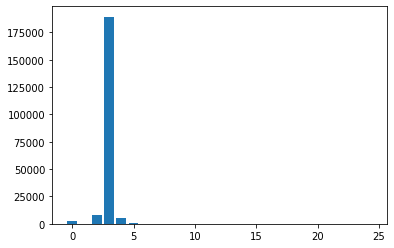

In [129]:
plt.bar(a,val)